# LOGISITIC REGRESSION

# 1. Collect Data: Import Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as pt
%matplotlib inline
import math

titanic_data=pd.read_csv('train.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
print('# of passengers in original data:'+str(len(titanic_data.index)))

# of passengers in original data:891


# 2.Analyzing Data

create different plot to check relationship between variables

<AxesSubplot:xlabel='Survived', ylabel='count'>

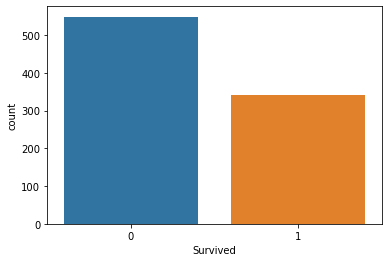

In [7]:
sn.countplot(x="Survived",data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

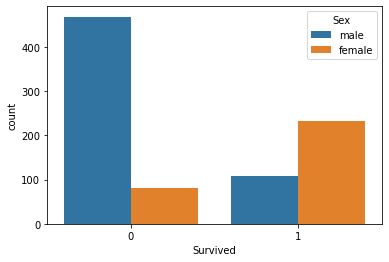

In [8]:
sn.countplot(x='Survived',hue='Sex',data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

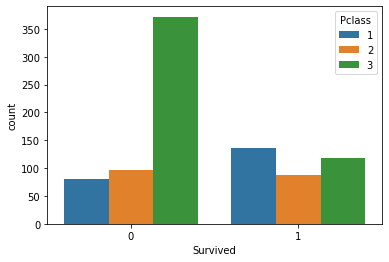

In [9]:
sn.countplot(x='Survived',hue='Pclass',data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

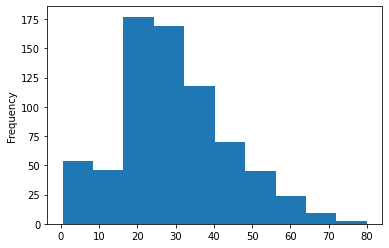

In [10]:
titanic_data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

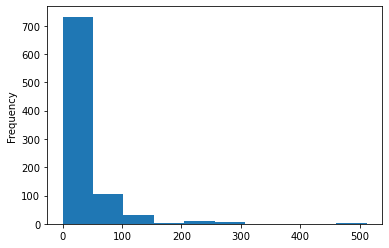

In [11]:
titanic_data['Fare'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

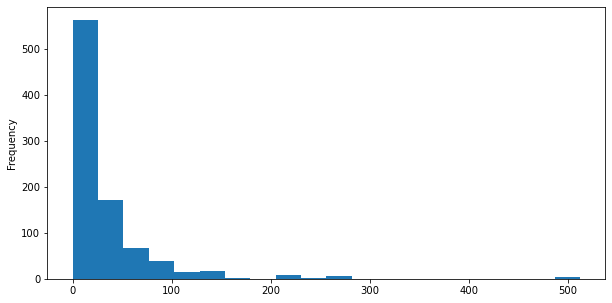

In [12]:
titanic_data['Fare'].plot.hist(bins=20,figsize=(10,5))

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

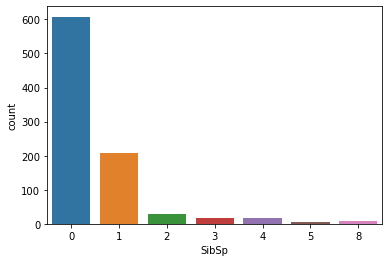

In [14]:
sn.countplot(x='SibSp',data=titanic_data)

# 3.Data Wrangling

Clean the data by removing the Nan values and unnecessary columns in the dataset

In [15]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

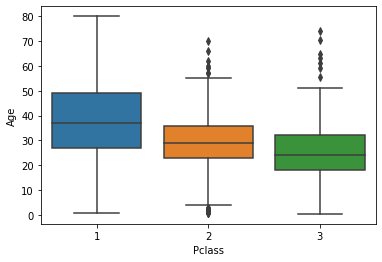

In [17]:
sn.boxplot(x='Pclass',y='Age',data=titanic_data)

In [18]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [20]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
titanic_data.dropna(inplace=True)

<AxesSubplot:>

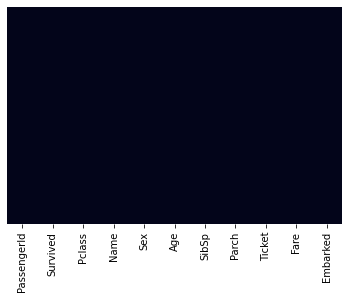

In [22]:
sn.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)

In [23]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [25]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [27]:
pcl=pd.get_dummies(titanic_data['Pclass'],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [28]:
titanic_data=pd.concat([titanic_data,sex,embark,pcl],axis=1)

In [29]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0,1,0,0,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0,0,0


In [30]:
titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [31]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [32]:
titanic_data.drop('Pclass',axis=1,inplace=True)

# 4.Train & Test Data

In [33]:
x=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']

In [34]:
x.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [35]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [38]:
x_train

,Age,SibSp,Parch,Fare,male,Q,S,2,3
699,42.0,0,0,7.6500,1,0,1,0,1
642,2.0,3,2,27.9000,0,0,1,0,1
434,50.0,1,0,55.9000,1,0,1,0,0
203,45.5,0,0,7.2250,1,0,0,0,1
586,47.0,0,0,15.0000,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
182,9.0,4,2,31.3875,1,0,1,0,1
809,33.0,1,0,53.1000,0,0,1,0,0
94,59.0,0,0,7.2500,1,0,1,0,1
292,36.0,0,0,12.8750,1,0,0,1,0


In [39]:
x_test

,Age,SibSp,Parch,Fare,male,Q,S,2,3
689,15.0,0,1,211.3375,0,0,1,0,0
279,35.0,1,1,20.2500,0,0,1,0,1
508,28.0,0,0,22.5250,1,0,1,0,1
9,14.0,1,0,30.0708,0,0,0,1,0
496,54.0,1,0,78.2667,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
854,44.0,1,0,26.0000,0,0,1,1,0
336,29.0,1,0,66.6000,1,0,1,0,0
385,18.0,0,0,73.5000,1,0,1,1,0
397,46.0,0,0,26.0000,1,0,1,1,0


In [40]:
y_test

689    1
279    1
508    0
9      1
496    1
      ..
854    0
336    0
385    0
397    0
280    0
Name: Survived, Length: 214, dtype: int64

In [41]:
y_train

699    0
642    0
434    0
203    0
586    0
      ..
182    0
809    1
94     0
292    0
51     0
Name: Survived, Length: 498, dtype: int64

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel=LogisticRegression()

In [44]:
logmodel.fit(x_train,y_train)

C:\Users\91630\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\91630\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
predictions=logmodel.predict(x_test)
predictions

C:\Users\91630\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       126
           1       0.72      0.72      0.72        88

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7710280373831776

In [50]:
from sklearn import metrics
import matplotlib.pyplot as pt

In [51]:
confusion_matrix=metrics.confusion_matrix(y_test,predictions)

In [52]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])

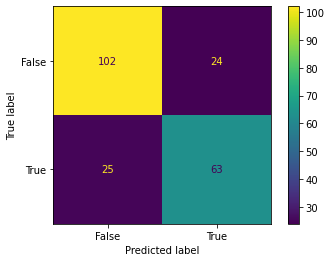

In [53]:
cm_display.plot()
pt.show()

In [54]:
confusion_matrix=metrics.confusion_matrix(y_test,predictions)
confusion_matrix

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [55]:
accuracy_score=metrics.accuracy_score(y_test,predictions)
accuracy_score

0.7710280373831776

In [56]:
precision=metrics.precision_score(y_test,predictions)
precision

0.7241379310344828

In [57]:
recall=metrics.recall_score(y_test,predictions)
#print(round(recall,3))
recall

0.7159090909090909

In [58]:
f1_score=metrics.f1_score(y_test,predictions)
f1_score

0.72

In [59]:
tn,fp,fn,tp=metrics.confusion_matrix(y_test,predictions).ravel()
tn,fp,fn,tp

(102, 24, 25, 63)